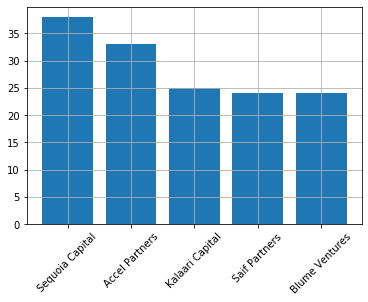

In [5]:
'''
Q.5. 
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. 
Now your friend wants to expand his startup and he is looking for new investors for his startup. 
Now you again come as a saviour to help your friend and want to create a list of probable new new investors. 
Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. 
Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. 
Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. 
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.


Answer: This question is almost similar to Q4 but here I need to filter out all the InvestmentType other than 
'Private Equity'. I did all the process which I have followed in Q4. just I have alter the condition of filtering out
the InvestmentType. After doing all, if I plot a bar graph then we can notice that Sequoia Capital has maximum number
of investment as investment type='Private Equity' in different startup. So it is better to contact Sequoia Capital.

'''

# Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# City Locations where startup can be estabilished 
target_locations = {'Bangalore','Mumbai','Gurgaon','Noida','New Delhi'}

# City Name Extraction 
def city_name(name):
    return name.split('/')[0].strip()

# Filter Cities and make other null
def filter_city(city):
    if city in target_locations:
        return city
    return ''



# Investors name and how many times invested in differnt startups
investors = {}

def startup_investors(startup_investor):
    startup_investor = str(startup_investor)
    startupname = startup_investor.split('###')[0].strip().title()
    investornames = startup_investor.split('###')[1]
    investornames = investornames.split(',')
    for name in investornames:
        name = name.strip().title()
        if name!='':
            if investors.get(name) is None:
                investors[name] = set([startupname])
            else:
                if startupname not in investors[name]:
                    investors[name].add(startupname)
    return startup_investor



# Update Investment Type Name
def updateType(investtype):
    if investtype=='SeedFunding':
        return 'Seed Funding'
    if investtype=='Crowd funding':
        return 'Crowd Funding'
    if investtype=='PrivateEquity':
        return 'Private Equity'
    return investtype

# Update Startup Names
def updateStartupName(name):
    oyonames = ['Oyo Rooms','OYO Rooms','OyoRooms','Oyorooms','Oyo']
    olanames = ['Olacabs','Ola','Ola Cabs']
    flipkartnames = ['Flipkart.com','Flipkart']
    paytmnames = ['Paytm','Paytm Marketplace']
    if name in oyonames:
        return 'Oyo'
    if name in olanames:
        return 'Ola'
    if name in flipkartnames:
        return 'Flipkart'
    if name in paytmnames:
        return 'Paytm'
    return name

# Load Data
df_startups=pd.read_csv('startup_funding.csv',encoding='utf-8') 

# Drop null valued rows 
df_startups = df_startups[pd.notna(df_startups['InvestmentType'])]


# Update with proper investment type
df_startups["InvestmentType"] = df_startups["InvestmentType"].apply(updateType)

# Filter out only Private Equity
df_startups = df_startups[df_startups['InvestmentType']=='Private Equity']


# Droping all rows wherein no startup name and investor name is present
df_startups = df_startups[pd.notna(df_startups['InvestorsName'])]
df_startups = df_startups[pd.notna(df_startups['StartupName'])]


# Drop all rows wherein city name is missing
df_startups['CityLocation'].dropna(inplace = True) 

# Get Location Names
df_startups['CityLocation'] = df_startups['CityLocation'].apply(city_name) # First City Name

# Handle Case Sensitive and Proper Name 
df_startups['CityLocation'].replace('Delhi','New Delhi', inplace = True) 
df_startups['CityLocation'].replace('bangalore','Bangalore',inplace = True)


# Only cities where friend wants to estabilish startup.
df_startups['CityLocation'] = df_startups['CityLocation'].apply(filter_city)
index = df_startups[df_startups['CityLocation']==''].index
df_startups.drop(index,inplace=True)


# Update with proper startup name
df_startups['StartupName'] = df_startups['StartupName'].apply(updateStartupName)

# Combine the startup name and investor names 
df_startups['startup_investor'] = df_startups['StartupName'] + '###' + df_startups['InvestorsName']
df_startups['startup_investor'] = df_startups['startup_investor'].apply(startup_investors)


investor_counts = [[len(value),key]for key, value in investors.items()]
investor_counts.sort(reverse=True)

investor = [ i[1] for i in investor_counts[0:5]]
counts = [ i[0] for i in investor_counts[0:5]]

plt.bar(investor,counts)
plt.xticks(rotation=45)
plt.grid()
plt.show()
